In [21]:
import yfinance as yf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import mplfinance as mpf

SPECIAL_DATES = [
    {'date': '2019-12-26', 'desc': '张继先首次发现并上报此不明原因肺炎'},
    {'date': '2020-01-06', 'desc': '中国疾控中心内部启动二级应急响应'},
    {'date': '2020-01-15', 'desc': '中国疾控中心转为一级应急响应'},
    {'date': '2020-01-23', 'desc': '所有进出武汉的交通都被禁止，一天之后，整个湖北省内都被禁止'},
    {'date': '2020-02-01', 'desc': '钻石公主号: 一名80岁香港老翁确诊感染'},
    {'date': '2020-02-12', 'desc': '累积通报中国大陆确诊59804例，死亡1367例，治愈出院5911例；当日新增确诊15152例，新增死亡254例'},
    {'date': '2020-02-23', 'desc': '韩国大邱新天地教会内发生大规模聚集性感染，韩国疫情预警上调至最高级别'},
#     {'date': '2020-02-26', 'desc': '中国境外上报的新增病例首次超过中国境内，中国新冠疫情已现峰值“拐点”，目前担忧全球扩散'},
#     {'date': '2020-02-29', 'desc': '世卫组织将疫情全球风险级别由此前的“高”上调至“非常高”'},
    {'date': '2020-03-10', 'desc': '意大利将封锁隔离措施扩大至全国'},
    {'date': '2020-03-12', 'desc': '中国大陆新增确诊病例15例（其中武汉8例、境外输入6例），中国疫情高峰已过', 'color': 'g'},
#     {'date': '2020-03-14', 'desc': '西班牙全国范围内实施“封城”措施'},
#     {'date': '2020-03-26', 'desc': '美国确诊人数首次超越中国'},
    {'date': '2020-03-27', 'desc': '2万亿美元的经济刺激计划签字生效', 'color': 'b'},
    {'date': '2020-04-04', 'desc': '美国确诊人数突破30万'},
    {'date': '2020-04-28', 'desc': '美国新冠肺炎确诊人数超过100万人'},
    {'date': '2020-05-27', 'desc': '美国死亡人数超过10万人'},
#     {'date': '2020-06-11', 'desc': '美国新冠肺炎确诊人数超过200万人'},
#     {'date': '2020-06-27', 'desc': '全球新冠肺炎确诊人数超过1000万人'},
#     {'date': '2020-07-06', 'desc': '美国新冠肺炎确诊人数超过300万人'},
#     {'date': '2020-07-23', 'desc': '美国新冠肺炎确诊人数超过400万人'},
    {'date': '2020-08-08', 'desc': '美国新冠肺炎确诊人数超过500万人'},
#     {'date': '2020-08-29', 'desc': '美国新冠肺炎确诊人数超过600万人'},
#     {'date': '2020-09-22', 'desc': '美国新冠肺炎确诊人数超过700万人'},
    {'date': '2020-10-02', 'desc': '川普和夫人确诊'},
    {'date': '2020-10-15', 'desc': '中国浙江允许紧急接种疫苗', 'color': 'g'},
    {'date': '2020-10-23', 'desc': '全球单日确诊高达 51 万人'},
#     {'date': '2020-10-29', 'desc': '美国新冠肺炎确诊人数超过900万人'},
#     {'date': '2020-10-31', 'desc': '美国单日新增超 10 万人'},
#     {'date': '2020-11-06', 'desc': '美国单日新增超 12 万人'},
    {'date': '2020-11-08', 'desc': '美国新冠肺炎确诊人数超过1000万人'},
#     {'date': '2020-11-11', 'desc': '美国单日新增超 20 万人'},
    {'date': '2020-11-20', 'desc': '辉瑞申请疫苗紧急使用授权', 'color': 'g'},
    {'date': '2020-11-26', 'desc': '全球新冠肺炎确诊人数破6000万人、死亡人数逾141万人'},
    {'date': '2020-11-30', 'desc': '莫德纳申请疫苗紧急使用授权', 'color': 'g'},
    {'date': '2020-12-07', 'desc': '美国新冠肺炎确诊人数超过1500万人'},
    {'date': '2020-12-09', 'desc': '阿联酋正式批准中国国药的Covid-19疫苗上市', 'color': 'g'},
    {'date': '2020-12-12', 'desc': '美国单日新增超 24 万人'},
    {'date': '2020-12-20', 'desc': '9000亿美元疫情纾困方案达成协议', 'color': 'b'},
    {'date': '2020-12-23', 'desc': '美国已经有100.8万人接种第一剂辉瑞或莫德纳疫苗', 'color': 'g'}
]

%matplotlib inline

In [22]:
def get_ticker_history(ticker, period='3y', interval='1d'):
    t = yf.Ticker(ticker)
    return t.history(period=period, interval=interval)

def get_between(df, start, end):
    return df.loc[start:end]

def draw_candlestick(df, title, lines = []):
    vls, colors, widths = ([], [], [])
    for line in lines:
        vls.append(line['date'])
        colors.append(line.get('color', 'r'))
        widths.append(line.get('width', 1))
    vlines = dict(vlines=vls, linewidths=widths, colors=colors, alpha=0.4)
    mpf.plot(df, type='candle', vlines=vlines, style='yahoo', mav=(5,20,60), volume=True, figsize=(18, 8), title=title)


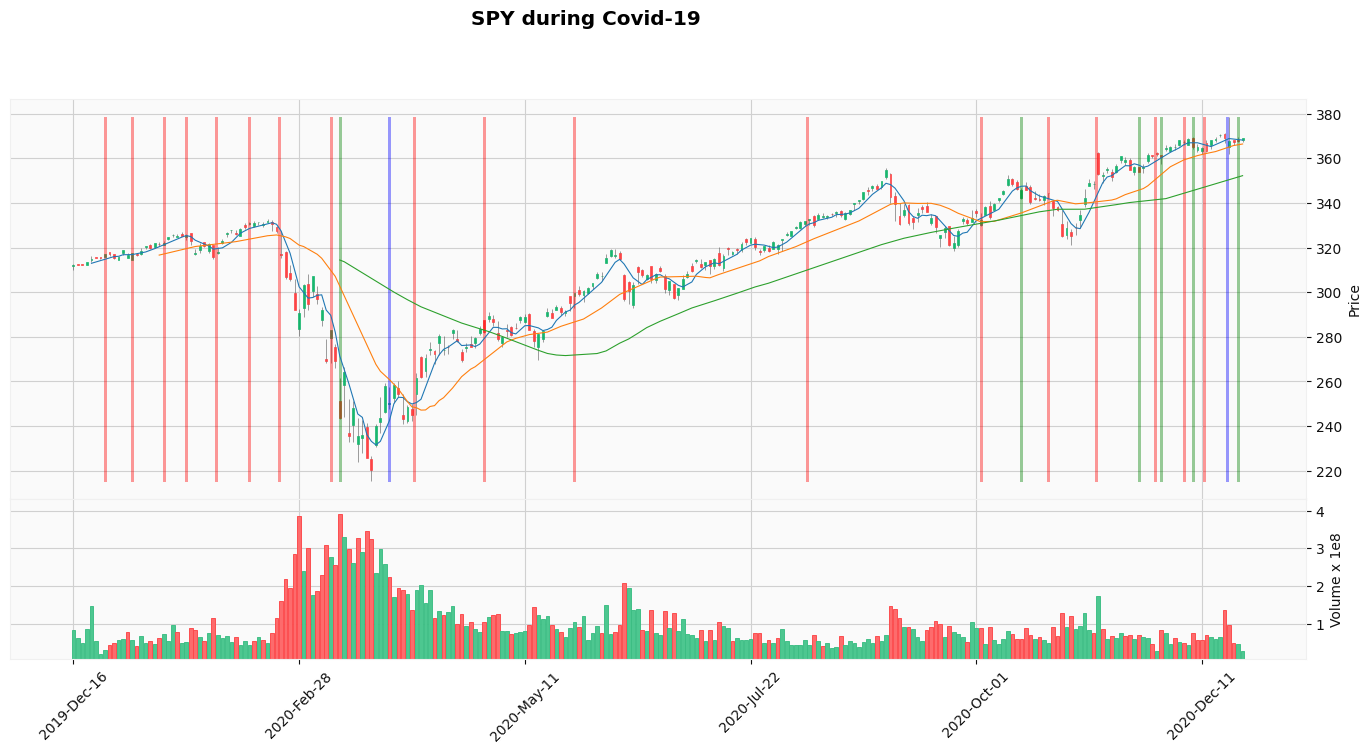

In [23]:
gs = get_ticker_history('SPY', '2y')
df = gs.loc['2019-12-15':'2020-12-24']
draw_candlestick(df, 'SPY during Covid-19', lines=SPECIAL_DATES)